# Explorar datos
* Obtener estadisticas basicas
* Graficar las variables
    - Histogramas
    - Box plots
    - Scartter plots
* Calcular correlacion con la variable objetivo
* Check si es normal


In [1]:
! pip install numpy pandas plotly scipy pysqlite3

data                    exploracion_datos.ipynb


In [3]:
import numpy as np
import os
import pandas as pd
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.express as px
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### Preguntas
* Cuales son las estadisticas descriptivas de la base de autos?

In [4]:
df = pd.read_csv("data/CARS.csv")

In [5]:
conn = sqlite3.connect('data/db_cars')
c = conn.cursor()

In [6]:
df.to_sql('cars', conn, if_exists='replace', index = False)

In [11]:
df.head(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [7]:
df.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [12]:
df.describe(include="all")

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428,428,428,428,428,428,428,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
unique,38,425,6,3,3,410,425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Toyota,C240 4dr,Sedan,Asia,Front,"$23,895","$68,306",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,2,262,158,226,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000


In [15]:
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [16]:
query_str = """
    SELECT make, count(*), max(Invoice)
    FROM CARS
    GROUP BY make
    ORDER BY 2 desc
"""


In [17]:
df_qry = pd.DataFrame(c.execute(query_str).fetchall(), columns =["make","num","mean"])    
df_qry.head(10)

,make,num,mean
0,Toyota,28,"$47,986"
1,Chevrolet,27,"$45,193"
2,Mercedes-Benz,26,"$88,324"
3,Ford,23,"$36,494"
4,BMW,20,"$66,830"
5,Audi,19,"$76,417"
6,Nissan,17,"$31,845"
7,Honda,17,"$29,965"
8,Volkswagen,15,"$69,130"
9,Chrysler,15,"$35,063"


In [25]:
df[["Make","Weight"]][df.Make == "Audi"]
df[["Make","Weight"]].query('Make == "Audi"').head(2)

,Make,Weight
7,Audi,3252
8,Audi,3638


In [26]:
df[["Make","Model","Invoice"]]\
    .groupby(["Make"]).agg({"Model":"count","Invoice":"max"})\
    .sort_values(by="Model",ascending=False).head(10)

,Model,Invoice
Make,,
Toyota,28,"$47,986"
Chevrolet,27,"$45,193"
Mercedes-Benz,26,"$88,324"
Ford,23,"$36,494"
BMW,20,"$66,830"
Audi,19,"$76,417"
Honda,17,"$29,965"
Nissan,17,"$31,845"
Volkswagen,15,"$69,130"


In [27]:
df["Invoice"] = df["Invoice"].replace('[\$,]', '', regex=True).astype(float)

In [29]:
df[["Make","Model","Invoice"]]\
    .groupby(["Make"]).agg({"Model":"count","Invoice":"mean"})\
    .sort_values(by="Invoice",ascending=False).head(10)

,Model,Invoice
Make,,
Porsche,7,73662.857143
Mercedes-Benz,26,56453.307692
Jaguar,12,56098.416667
Cadillac,8,46426.875000
Hummer,1,45815.000000
Land Rover,3,41851.000000
BMW,20,39620.650000
Audi,19,39330.105263
Lincoln,9,39135.777778


In [31]:
df.describe()

,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [35]:
print((173560.000000-30014.700935)/17642.117750)

8.136511789521414


<AxesSubplot:>

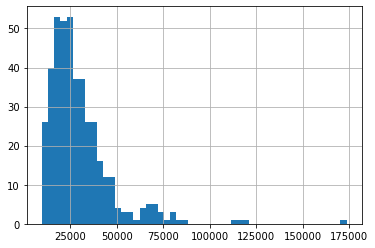

In [36]:
df["Invoice"].hist(bins=50)

In [41]:
fig = px.histogram(df[["Invoice"]], x="Invoice", nbins=50)
fig.show()

In [97]:
k2, p = stats.normaltest(df[["Invoice"]].query("Invoice <= 50000")["Invoice"].values)
alpha = 1e-3
if p < alpha:
    print("It is not nomal")
else:
    print("It is normal")

It is not nomal


In [44]:
fig = px.histogram(np.log2(df[['Invoice']].query("Invoice <= 70000")), x="Invoice", nbins=50)
fig.show()

In [45]:
k2, p = stats.normaltest(np.log2(df[['Invoice']].query("Invoice <= 70000")).values)
alpha = 1e-3
if p < alpha:
    print("It is not nomal")
else:
    print("It is normal")

It is normal


In [78]:
fig = px.scatter_matrix(df[["MPG_Highway","Horsepower","EngineSize","Wheelbase"]])
fig.show()

In [47]:
fig = px.box(df, x="Make", y="MPG_Highway")
fig.show()

In [122]:
fig = px.imshow(df.corr(), text_auto=True)
fig.show()

In [50]:
pd.cut(x=df['Invoice'],bins=20)

0        (26243.5, 34427.75]
1        (18059.25, 26243.5]
2        (18059.25, 26243.5]
3        (26243.5, 34427.75]
4        (34427.75, 42612.0]
5        (34427.75, 42612.0]
6        (75349.0, 83533.25]
7        (18059.25, 26243.5]
8        (26243.5, 34427.75]
9        (26243.5, 34427.75]
10       (26243.5, 34427.75]
11       (26243.5, 34427.75]
12       (26243.5, 34427.75]
13       (34427.75, 42612.0]
14       (34427.75, 42612.0]
15       (34427.75, 42612.0]
16       (34427.75, 42612.0]
17       (42612.0, 50796.25]
18       (58980.5, 67164.75]
19       (42612.0, 50796.25]
20       (75349.0, 83533.25]
21       (26243.5, 34427.75]
22       (26243.5, 34427.75]
23       (34427.75, 42612.0]
24       (34427.75, 42612.0]
25       (42612.0, 50796.25]
26       (26243.5, 34427.75]
27       (42612.0, 50796.25]
28       (18059.25, 26243.5]
29       (26243.5, 34427.75]
30       (34427.75, 42612.0]
31       (26243.5, 34427.75]
32       (26243.5, 34427.75]
33       (26243.5, 34427.75]
34       (2624

In [52]:
pd.qcut(df['Invoice'], 10)

0       (32987.5, 38401.2]
1       (20288.1, 23009.2]
2       (23009.2, 25294.5]
3       (28963.6, 32987.5]
4       (38401.2, 48103.3]
5       (38401.2, 48103.3]
6      (48103.3, 173560.0]
7       (23009.2, 25294.5]
8       (28963.6, 32987.5]
9       (25294.5, 28963.6]
10      (28963.6, 32987.5]
11      (28963.6, 32987.5]
12      (32987.5, 38401.2]
13      (32987.5, 38401.2]
14      (32987.5, 38401.2]
15      (38401.2, 48103.3]
16      (38401.2, 48103.3]
17      (38401.2, 48103.3]
18     (48103.3, 173560.0]
19      (38401.2, 48103.3]
20     (48103.3, 173560.0]
21      (28963.6, 32987.5]
22      (32987.5, 38401.2]
23      (32987.5, 38401.2]
24      (32987.5, 38401.2]
25      (38401.2, 48103.3]
26      (32987.5, 38401.2]
27      (38401.2, 48103.3]
28      (25294.5, 28963.6]
29      (25294.5, 28963.6]
30      (32987.5, 38401.2]
31      (25294.5, 28963.6]
32      (28963.6, 32987.5]
33      (32987.5, 38401.2]
34      (32987.5, 38401.2]
35      (32987.5, 38401.2]
36      (38401.2, 48103.3]
3